# Solving Simultaneous Equilibrium Chemical Reactions with Python

In the realm of computational chemistry, understanding the intricate dynamics of simultaneous equilibrium reactions is a formidable challenge. To address this, a Python project has emerged, leveraging the power of object-oriented programming and linear algebra techniques.

This project presents a comprehensive solution for solving acid-base calculations involving multiple simultaneous equilibrium chemical reactions. At its core lies a robust solver, engineered to handle diverse reaction scenarios with ease.

Driven by the principles of object-oriented design, the project encapsulates each chemical species and reaction as distinct objects, facilitating modularity and extensibility. This design approach not only enhances code readability but also streamlines the addition of new reactions or species.

From a computational perspective, the project adopts a linear algebra framework, treating the chemical equations as a system of linear equations. Leveraging numerical methods, such as Levenberg-Marquardt least squares or iterative solvers, it efficiently determines the equilibrium concentrations of all species involved.

Moreover, the project prioritizes user-friendliness, offering an intuitive interface for inputting reaction equations and initial conditions. This enables researchers and students alike to effortlessly explore complex chemical systems and analyze equilibrium behavior.

In summary, this Python project represents a different approach in computational chemistry, providing a systematic and accessible approach to solving simultaneous equilibrium reactions. By combining object-oriented design principles with linear algebra techniques, it empowers users to tackle diverse chemical scenarios with confidence and efficiency.

## Understanding Acid-Base Equilibrium: Calculating the pH of Acetic Acid

As a cornerstone example within the comprehensive Python project for solving simultaneous equilibrium chemical reactions, the calculation of the pH of acetic acid serves as a compelling illustration of its capabilities.

Acetic acid, a weak acid commonly found in vinegar, undergoes equilibrium with its conjugate base, acetate ion, in an aqueous solution. This equilibrium can be represented by the chemical equation:

$$ \text{CH}_3\text{COOH} \rightleftharpoons \text{CH}_3\text{COO}^- + \text{H}^+ $$

To determine the pH of a solution containing acetic acid, one must consider the equilibrium concentrations of all relevant species. Leveraging the Python project's object-oriented approach, the acetic acid and acetate ion are treated as distinct chemical species, each encapsulated within their respective objects.

Utilizing the underlying linear algebra framework, the project systematically solves the equilibrium equations to ascertain the concentrations of the acid, its conjugate base, and the hydrogen ion. With these concentrations in hand, the pH of the solution can be calculated using the familiar formula:

$$ \text{pH} = -\log[\text{H}^+] $$

This example not only showcases the project's computational prowess but also highlights its educational value. By providing a clear and structured methodology for solving such equilibrium problems, it empowers users to deepen their understanding of acid-base chemistry concepts.

In essence, the calculation of the pH of acetic acid exemplifies the project's mission: to demystify complex chemical phenomena through a combination of object-oriented programming, linear algebra techniques, and intuitive user interfaces.

In [1]:
# Import chemical modules
from molecule import Molecule
from reaction import Reaction
from system import System

# Import numerical processing libraries
import numpy as np
import pandas as pd

# Import visualization libraries
import matplotlib.pyplot as plt
from IPython.display import display

# Create some substances
acetic_acid = Molecule(name = 'HC2H3O2')
hydron = Molecule(name = 'H+', charge = +1)
acetate = Molecule(name = 'C2H3O2-', charge = -1)
hydroxide = Molecule(name = 'OH-', charge = -1)

# Create the reactions present
acetic_dissociation = Reaction(
    species = {acetic_acid: -1, hydron: 1, acetate: 1}, 
    equilibrium_constant = 1.8e-5,
)
water_dissociation = Reaction(
    species = {hydroxide:1, hydron:1}, 
    equilibrium_constant = 1.0e-14,
)

# Create and solve the reaction system
system = System(reactions = {acetic_dissociation, water_dissociation}, conservation = {'C2H3O2':0.5})
system.solve()

# Print the results and use this website to validate: https://www.aqion.onl/
cH = hydron.concentration
pH = -np.log10(cH)
print(f'The equilibrium concentration of hydron is [H+]={cH:.5f} and the pH is {pH:.3f}')

# initialize data of lists.
data = {
    'Molecule': list(system.molecules),
	'Concentration [M]': system.concentrations,
}

# Create DataFrame
df = pd.DataFrame(data)

# Print the output
display(df)

The equilibrium concentration of hydron is [H+]=0.00299 and the pH is 2.524


,Molecule,Concentration [M]
0,C2H3O2-,2.991013e-03
1,OH-,3.343348e-12
2,HC2H3O2,4.970090e-01
3,H+,2.991014e-03


## Title: Exploring Titration Dynamics: Hydrochloric Acid Titrated with Sodium Hydroxide

Within the Python project designed for solving simultaneous equilibrium chemical reactions, a compelling example unfolds in the titration of hydrochloric acid (HCl) with sodium hydroxide (NaOH). This classic chemical process unveils intricate equilibrium dynamics and showcases the project's robust solver in action.

Titration involves the gradual addition of a titrant, in this case, sodium hydroxide, to a solution containing the analyte, hydrochloric acid. The chemical reaction between HCl and NaOH proceeds as follows:

$$ \text{HCl} + \text{NaOH} \rightarrow \text{NaCl} + \text{H}_2\text{O} $$

As the titration progresses, the concentrations of both HCl and NaOH change, leading to shifting equilibrium conditions. Here, the project's object-oriented approach shines, with each chemical species represented as distinct objects, facilitating a systematic analysis of the reaction.

Employing the linear algebra framework at its core, the project dynamically adjusts the equilibrium equations with each addition of titrant. This enables real-time computation of the concentrations of all relevant species, including the resulting salt, sodium chloride (NaCl), and water (H2O).

Furthermore, the project's intuitive interface empowers users to explore various titration scenarios effortlessly. By inputting the initial concentrations of HCl and NaOH, as well as the volume of titrant added, researchers and students can visualize the titration curve and extract crucial information such as the equivalence point and buffering regions.

Through the titration of hydrochloric acid with sodium hydroxide, this example elucidates not only the intricacies of acid-base equilibrium but also the project's versatility in tackling complex chemical processes. By combining object-oriented programming principles with advanced numerical methods, it provides a comprehensive platform for studying and understanding titration dynamics with unparalleled depth and clarity.

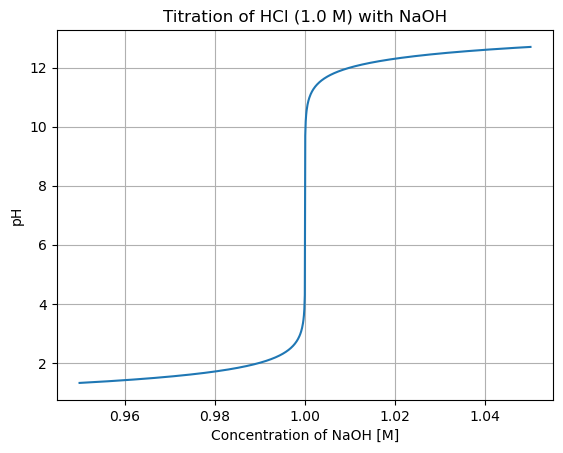

In [2]:
# Create some substances
hydrochloric_acid = Molecule(name = 'HCl', charge = 0)
hydron = Molecule(name = 'H+', charge = +1)
chloride = Molecule(name = 'Cl-', charge = -1)
sodium_hydroxide = Molecule(name = 'NaOH')
sodium_ion = Molecule(name = 'Na+', charge = +1)
hydroxide = Molecule(name = 'OH-', charge = -1)

# Create the reactions present
hydrochloric_dissociation = Reaction(
	species = {hydrochloric_acid: -1, hydron: 1, chloride: 1}, 
	equilibrium_constant = 1.**6.1,
)
sodium_hydroxide_dissociation = Reaction(
	species = {sodium_hydroxide: -1, sodium_ion: 1, hydron: 1}, 
	equilibrium_constant = 1.**-0.2,
)
water_dissociation = Reaction(
	species = {hydroxide:1, hydron:1}, 
	equilibrium_constant = 1.e-14,
)

# Create and solve the reaction system
system = System(
	reactions = {hydrochloric_dissociation, sodium_hydroxide_dissociation, water_dissociation}, 
	conservation = {'Cl':1.0, 'Na':0.95},
)

# Use the brute solve method, since this system is stiff and hard to solve
success = system.brute_solve(0.9, 1,1)

# Get the hydron concentration and calculate the pH
cH = hydron.concentration
pH = -np.log10(hydron.concentration)

# Add the pH to the pH array for later visualization
pH_arr = [pH]

# Now use the initial result to move along small steps
guess = system.concentrations

# Loop over a range of values
ci_arr = np.linspace(0.95, 1.05, 1000)
for ci in ci_arr[1:]:

	# Set the Sodium conservation condition
	system.conservation['Na'] = ci

	# Solve the system
	sucess = system.solve(initial_guess=guess)

	# Update the guess values
	guess = system.concentrations

	# Get the hydron concentration and calculate the pH
	cH = hydron.concentration
	pH = -np.log10(cH)

	# Add the pH to the pH array for later visualization
	pH_arr.append(pH)

# Plot the results
plt.plot(ci_arr, pH_arr)
plt.xlabel("Concentration of NaOH [M]")
plt.ylabel("pH")
plt.title('Titration of HCl (1.0 M) with NaOH')
plt.grid()
plt.show()